# ML with Python

Future Amount paid using Python

The dataset given here contains the data about the amount paid as a bill in cafe. Below is the description of all the columns in the dataset:

RowNumber-Index,
Number-Identification Number,
Gender-Male, Female gender group,
NameSet-Nationality,
Title-Mr., Mrs.,Ms.,
GivenName-Client's name,
MiddleInitial-Middle name initial,
Surname-Client's surname,
AmountPaid-Bill paid,
StreetAddress-Home address,
City-City of location of cafe,
State-State of location of cafe: Initials,
StateFull- State of location of cafe: full name of the state,
ZipCode- Zipcode of location of cafe,
Country-Country name: Initials,
CountryFull- Country name: full,
Feedback-Feedback left be clients for service provided,
EmailAddress-Client's email adddress,
Username-username of a client if order was done on the webpage,
Password-password for log in,
BrowserUserAgent-Browser used by client,
TelephoneNumber-Cell phone number,
TelephoneCountryCode-Telephone country code,
MothersMaiden-Mother's maiden name,
Birthday-The date of birthday of a client,
TropicalZodiac-Zodiac sign of a client,
CCType-Credit card type,
CCNumber-Credit card number,
CVV2-credit card cvv code,
CCExpires-credit card expiration date,
NationalID-National identification number,
UPS-uninterruptible power supply,
WesternUnionMTCN-Western Union Money Transfer Control Number,
MoneyGramMTCN-MoneyGram Money Transfer Control Number,
Color-color of credit card,
Occupation-Client's occupation,
Company-Client's workplace,
Vehicle-Client's vehicle,
Domain-Domain used by company,
BloodType-Client's blood type,
Pounds-Client's weight in pounds,
Kilograms-Client's weight in kilograms,
FeetInches-Client's height in inches,
Centimeters-Client's height in centimeters,
GUID-globally unique identifier,
Latitude-Latitude of location,
Longitude-Longitude of location

Let’s start the task of future amount paid with machine learning by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

The following step is to import tensorflow libraries for prediction step at the end. 

In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

2024-02-28 09:37:58.642869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [88]:
#Below is the version of Tensorflow
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.14.1
TensorFlow Decision Forests v1.6.0


In [3]:
#Uploading the inputs 
data = pd.read_csv('FakeNames_DRV_20240131_final.csv', encoding='latin1')

In [4]:
data.head()

,RowNumber,Number,Gender,NameSet,Title,GivenName,MiddleInitial,Surname,AmountPaid,StreetAddress,...,Vehicle,Domain,BloodType,Pounds,Kilograms,FeetInches,Centimeters,GUID,Latitude,Longitude
0,1,6218,male,Australian,Mr.,Aaron,V,Wise,4518.95,33 Amos St,...,2001 Mazda CU-X,EasternCountry.co.za,A-,149.6,68.0,"6' 1""",186.0,f625e1a4-ebb1-43ba-8826-c1c83a8c6d74,-25.321312,28.208745
1,2,6219,male,Russian,Mr.,Moses,S,Afanasyev,68893.80,2125 Dickens St,...,2008 Volkswagen Sharan,LongBomb.co.za,B+,200.9,91.3,"6' 2""",187.0,78d73572-a43e-4e83-adfe-45686af21037,-26.137940,28.279978
2,3,6220,male,Igbo,Mr.,Onwuemelie,C,Chukwukere,1469.34,797 Stanza Bopape St,...,2011 Audi S3,PoliticalSun.co.za,O+,221.8,100.8,"5' 6""",168.0,7cb11e44-fa18-486d-bec7-c7776aed5f24,-23.079237,29.813747
3,4,6221,male,Eritrean,Mr.,Tewolde,S,Habte,55175.54,817 Union Lane,...,2008 Subaru Impreza,LawnCovers.co.za,O+,244.9,111.3,"6' 1""",186.0,8906d4e9-b432-4555-8c1a-98e781596ab6,-29.769570,30.255806
4,5,6222,female,American,Mrs.,Debbie,E,Radcliffe,36363.82,478 Wolmarans St,...,2015 Ford Fusion Hybrid,TrashCovers.co.za,O+,151.6,68.9,"5' 3""",159.0,2afc0ca0-e6db-4743-b3e9-7b3b7aafc3d3,-26.075120,27.994841


In [5]:
data.describe()

,RowNumber,Number,AmountPaid,ZipCode,TelephoneCountryCode,CCNumber,CVV2,NationalID,WesternUnionMTCN,MoneyGramMTCN,Pounds,Kilograms,Centimeters,Latitude,Longitude
count,49863.000000,49863.00000,49863.000000,49863.000000,49863.0,4.986300e+04,49863.000000,0.0,4.986300e+04,4.986300e+04,49863.000000,49863.000000,49863.000000,49863.000000,49863.000000
mean,24935.821952,24965.47821,49872.002656,3791.076189,27.0,5.009138e+15,500.535327,NaN,5.007859e+09,4.985340e+07,184.599731,83.908934,172.565389,-28.338658,27.122102
std,14395.840815,14426.86327,28781.283684,2914.093483,0.0,3.765613e+14,288.062409,NaN,2.885854e+09,2.890053e+07,35.976896,16.353146,9.348273,3.343819,3.722847
min,1.000000,1.00000,1.090000,2.000000,27.0,4.485000e+15,1.000000,NaN,2.292820e+05,6.690000e+02,101.200000,46.000000,152.000000,-34.680244,16.389327
25%,12470.500000,12477.50000,25144.025000,1295.000000,27.0,4.556488e+15,252.000000,NaN,2.511125e+09,2.477127e+07,156.000000,70.900000,167.000000,-30.850956,26.198033
50%,24937.000000,24944.00000,49893.880000,3150.000000,27.0,5.100396e+15,501.000000,NaN,5.028922e+09,4.991179e+07,185.000000,84.100000,172.000000,-27.023773,28.138181
75%,37402.500000,37415.50000,74693.680000,6215.000000,27.0,5.349811e+15,751.000000,NaN,7.510911e+09,7.487100e+07,213.800000,97.200000,180.000000,-25.763945,29.525050
max,49868.000000,50000.00000,99998.990000,9992.000000,27.0,5.599997e+15,999.000000,NaN,9.999992e+09,9.999986e+07,257.400000,117.000000,190.000000,-22.251141,32.667954


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49863 entries, 0 to 49862
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             49863 non-null  int64  
 1   Number                49863 non-null  int64  
 2   Gender                49863 non-null  object 
 3   NameSet               49863 non-null  object 
 4   Title                 49855 non-null  object 
 5   GivenName             49848 non-null  object 
 6   MiddleInitial         49852 non-null  object 
 7   Surname               49540 non-null  object 
 8   AmountPaid            49863 non-null  float64
 9   StreetAddress         49862 non-null  object 
 10  City                  49862 non-null  object 
 11  State                 49862 non-null  object 
 12  StateFull             49862 non-null  object 
 13  ZipCode               49863 non-null  int64  
 14  Country               49863 non-null  object 
 15  CountryFull        

In [7]:
data.isnull()

,RowNumber,Number,Gender,NameSet,Title,GivenName,MiddleInitial,Surname,AmountPaid,StreetAddress,...,Vehicle,Domain,BloodType,Pounds,Kilograms,FeetInches,Centimeters,GUID,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49858,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Checking the null values
data.isnull().sum()

RowNumber                   0
Number                      0
Gender                      0
NameSet                     0
Title                       8
GivenName                  15
MiddleInitial              11
Surname                   323
AmountPaid                  0
StreetAddress               1
City                        1
State                       1
StateFull                   1
ZipCode                     0
Country                     0
CountryFull                 0
Feedback                33146
EmailAddress               32
Username                   32
Password                   32
BrowserUserAgent           32
TelephoneNumber            32
TelephoneCountryCode        0
MothersMaiden            4919
Birthday                    0
TropicalZodiac              0
CCType                      0
CCNumber                    0
CVV2                        0
CCExpires                   0
NationalID              49863
UPS                         0
WesternUnionMTCN            0
MoneyGramM

We will drop the NationalID column, as it does not contain any value and other columns which we will not use in our analysis and training. We will also asign the dataset with dropped columns to a new dataset data_mod. 

In [9]:
data_mod = data.drop(['NationalID', 'NameSet', 'Title', 'GivenName', 'MiddleInitial', 'Surname', 'EmailAddress', 'Username', 'Password', 'BrowserUserAgent', 'TelephoneNumber', 'MothersMaiden', 'Company'], axis=1)

Let's make additional check on null values for all columns left. 

In [10]:
data_mod.isnull().sum()

RowNumber                   0
Number                      0
Gender                      0
AmountPaid                  0
StreetAddress               1
City                        1
State                       1
StateFull                   1
ZipCode                     0
Country                     0
CountryFull                 0
Feedback                33146
TelephoneCountryCode        0
Birthday                    0
TropicalZodiac              0
CCType                      0
CCNumber                    0
CVV2                        0
CCExpires                   0
UPS                         0
WesternUnionMTCN            0
MoneyGramMTCN               0
Color                       0
Occupation                  0
Vehicle                     0
Domain                      0
BloodType                   0
Pounds                      0
Kilograms                   0
FeetInches                  0
Centimeters                 0
GUID                        0
Latitude                    0
Longitude 

As there are 33146 rows with missed feedback, we will fill all the empty rows with 'No feedback left' text as below

In [11]:
data_mod['Feedback'] = data_mod['Feedback'].fillna(value='No feedback left')
data_mod.isnull().sum()

RowNumber               0
Number                  0
Gender                  0
AmountPaid              0
StreetAddress           1
City                    1
State                   1
StateFull               1
ZipCode                 0
Country                 0
CountryFull             0
Feedback                0
TelephoneCountryCode    0
Birthday                0
TropicalZodiac          0
CCType                  0
CCNumber                0
CVV2                    0
CCExpires               0
UPS                     0
WesternUnionMTCN        0
MoneyGramMTCN           0
Color                   0
Occupation              0
Vehicle                 0
Domain                  0
BloodType               0
Pounds                  0
Kilograms               0
FeetInches              0
Centimeters             0
GUID                    0
Latitude                0
Longitude               0
dtype: int64

However, there are still null values in columns 'StreetAddress', 'City', 'State', 'StateFull' which can be dropped as the following:

In [12]:
data_mod.dropna(axis=0, inplace=True)

In [13]:
data_mod.isnull().sum()

RowNumber               0
Number                  0
Gender                  0
AmountPaid              0
StreetAddress           0
City                    0
State                   0
StateFull               0
ZipCode                 0
Country                 0
CountryFull             0
Feedback                0
TelephoneCountryCode    0
Birthday                0
TropicalZodiac          0
CCType                  0
CCNumber                0
CVV2                    0
CCExpires               0
UPS                     0
WesternUnionMTCN        0
MoneyGramMTCN           0
Color                   0
Occupation              0
Vehicle                 0
Domain                  0
BloodType               0
Pounds                  0
Kilograms               0
FeetInches              0
Centimeters             0
GUID                    0
Latitude                0
Longitude               0
dtype: int64

There are no null values anymore and we can go further with the next step. 

In [14]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49862 entries, 0 to 49862
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             49862 non-null  int64  
 1   Number                49862 non-null  int64  
 2   Gender                49862 non-null  object 
 3   AmountPaid            49862 non-null  float64
 4   StreetAddress         49862 non-null  object 
 5   City                  49862 non-null  object 
 6   State                 49862 non-null  object 
 7   StateFull             49862 non-null  object 
 8   ZipCode               49862 non-null  int64  
 9   Country               49862 non-null  object 
 10  CountryFull           49862 non-null  object 
 11  Feedback              49862 non-null  object 
 12  TelephoneCountryCode  49862 non-null  int64  
 13  Birthday              49862 non-null  object 
 14  TropicalZodiac        49862 non-null  object 
 15  CCType             

There are 49862 rows in th dataset.Now let us split the dataset into training and testing datasets:

In [15]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(data_mod)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

35172 examples in training, 14690 examples in testing.


We will define 'AmountPaid' as a label, the column to be predicted

In [16]:
label = 'AmountPaid'

There's one more step required before we can train the model. We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset). By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here.

In [17]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)


## Creating Random Forest model

In [117]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) 

Use /var/folders/f_/bqywq8n54xd4fjx3hx1fls340000gn/T/tmprj8204sq as temporary training directory


In [119]:
#Training the model
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.722870. Found 35172 examples.
Training model...


[INFO 24-02-28 13:45:50.9475 CET kernel.cc:1233] Loading model from path /var/folders/f_/bqywq8n54xd4fjx3hx1fls340000gn/T/tmprj8204sq/model/ with prefix 8c9a62ecd3f54f35
[INFO 24-02-28 13:45:57.3246 CET decision_forest.cc:660] Model loaded with 300 root(s), 2184048 node(s), and 27 input feature(s).
[INFO 24-02-28 13:45:57.3246 CET abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-02-28 13:45:57.3247 CET kernel.cc:1061] Use fast generic engine


Model trained in 0:10:55.871847
Compiling model...
Model compiled.


In [98]:
#tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter.

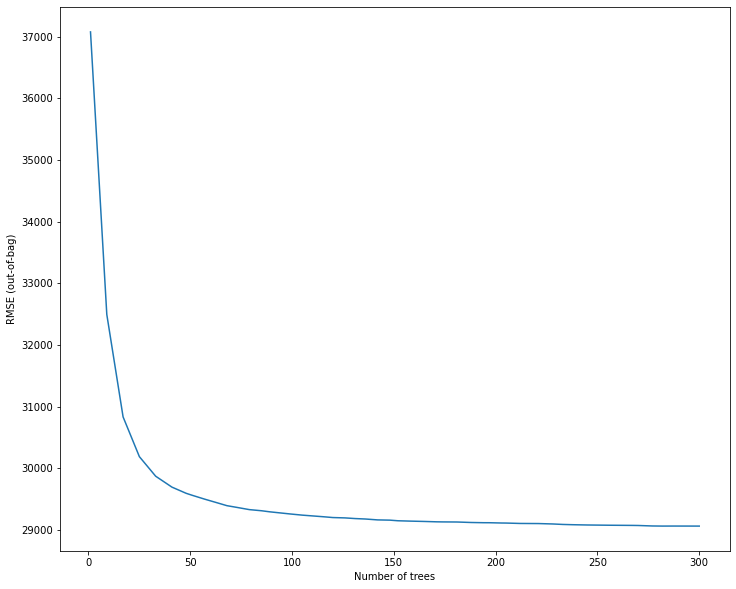

In [144]:
#Optional plotting the line
plt.figure(figsize=(12, 10))
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [121]:
#We can also see some general stats on the OOB dataset:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=35172, accuracy=None, loss=None, rmse=29062.91602351088, ndcg=None, aucs=None, auuc=None, qini=None)

In [123]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

15/15 [==============================] - 3s 176ms/step - loss: 0.0000e+00 - mse: 836040448.0000
loss: 0.0000
mse: 836040448.0000



Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees:

In [95]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


As an example, let us display the important features for the Variable Importance NUM_AS_ROOT.

The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [26]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CCExpires" (4; #2), 116.0),
 ("Feedback" (4; #12), 88.0),
 ("Occupation" (4; #21), 27.0),
 ("City" (4; #7), 24.0),
 ("Birthday" (4; #0), 11.0),
 ("FeetInches" (4; #13), 11.0),
 ("Vehicle" (4; #30), 7.0),
 ("MoneyGramMTCN" (1; #19), 5.0),
 ("Domain" (4; #11), 3.0),
 ("WesternUnionMTCN" (1; #31), 2.0),
 ("BloodType" (4; #1), 1.0),
 ("CCNumber" (1; #3), 1.0),
 ("CVV2" (1; #5), 1.0),
 ("Kilograms" (1; #16), 1.0),
 ("Pounds" (1; #22), 1.0),
 ("ZipCode" (1; #32), 1.0)]

In [27]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]


<Figure size 864x288 with 0 Axes>

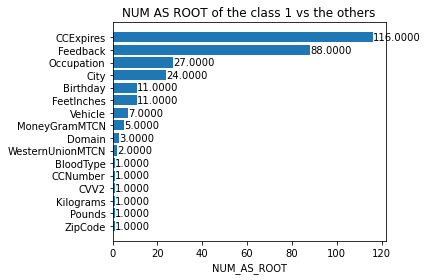

In [28]:
# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()


# Prediction 

We will predict based on the test input, which consists of 8 columns, the column Amount paid includes no data, which will be filled in after prediction.

In [29]:
#To be able to make a preiction we need to make the same changes on test dataset as the changes done to the data input
data_test = pd.read_csv('FakeNames_DRV_20240131_test.csv')
data_test_mod = data_test.drop(['NationalID', 'NameSet', 'Title', 'GivenName', 'MiddleInitial', 'Surname', 'EmailAddress', 'Username', 'Password', 'BrowserUserAgent', 'TelephoneNumber', 'MothersMaiden', 'Company', 'AmountPaid'], axis=1)

In [30]:
data_test_mod.isnull().sum()

RowNumber               0
Number                  0
Gender                  0
StreetAddress           0
City                    0
State                   0
StateFull               0
ZipCode                 0
Country                 0
CountryFull             0
Feedback                6
TelephoneCountryCode    0
Birthday                0
TropicalZodiac          0
CCType                  0
CCNumber                0
CVV2                    0
CCExpires               0
UPS                     0
WesternUnionMTCN        0
MoneyGramMTCN           0
Color                   0
Occupation              0
Vehicle                 0
Domain                  0
BloodType               0
Pounds                  0
Kilograms               0
FeetInches              0
Centimeters             0
GUID                    0
Latitude                0
Longitude               0
dtype: int64

In [31]:
data_test_mod['Feedback'] = data_test_mod['Feedback'].fillna(value='No feedback left')

In [32]:
data_test_mod.isnull().sum()

RowNumber               0
Number                  0
Gender                  0
StreetAddress           0
City                    0
State                   0
StateFull               0
ZipCode                 0
Country                 0
CountryFull             0
Feedback                0
TelephoneCountryCode    0
Birthday                0
TropicalZodiac          0
CCType                  0
CCNumber                0
CVV2                    0
CCExpires               0
UPS                     0
WesternUnionMTCN        0
MoneyGramMTCN           0
Color                   0
Occupation              0
Vehicle                 0
Domain                  0
BloodType               0
Pounds                  0
Kilograms               0
FeetInches              0
Centimeters             0
GUID                    0
Latitude                0
Longitude               0
dtype: int64

In [34]:
#Transfroming to the TFDF dataset from dataframe
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(data_test_mod)

In [43]:
submission_id = data_test_mod.Number
submission_id.head()

0    7210
1    7211
2    7212
3    7213
4    7214
Name: Number, dtype: int64

In [36]:
# Get the predictions for testdata
predictions = rf.predict(test_ds)

1/1 [==============================] - 0s 92ms/step


In [52]:

predictions

array([[48573.36],
       [48774.14],
       [45354.23],
       [40553.02],
       [44166.7 ],
       [48644.36],
       [39084.07],
       [47543.18]], dtype=float32)

In [53]:
output = pd.DataFrame({'ID_number': submission_id,
                         'AmountPaid': predictions.squeeze()})

In [57]:
output


,ID_number,AmountPaid
0,7210,48573.363281
1,7211,48774.136719
2,7212,45354.226562
3,7213,40553.023438
4,7214,44166.703125
5,7215,48644.363281
6,7216,39084.074219
7,7217,47543.183594


In [77]:
output_submission_df = pd.read_csv('FakeNames_DRV_20240131_test.csv')
output_submission_df['AmountPaid'] = predictions
#output_submission_df.to_csv('FakeNames_20240131_final_output', index=False)


In [83]:
output_submission_df['AmountPaid'] = output_submission_df['AmountPaid'].apply(lambda x: round(x, 2))

In [84]:
output_submission_df['AmountPaid']

0    48573.36
1    48774.14
2    45354.22
3    40553.02
4    44166.70
5    48644.36
6    39084.08
7    47543.18
Name: AmountPaid, dtype: float64

In [85]:
#We will save the ouptut with Amount Paid column filled in with prediction values
output_submission_df

,RowNumber,Number,Gender,NameSet,Title,GivenName,MiddleInitial,Surname,AmountPaid,StreetAddress,...,Vehicle,Domain,BloodType,Pounds,Kilograms,FeetInches,Centimeters,GUID,Latitude,Longitude
0,49869,7210,male,Japanese,Mr.,Masuto,T,Hikamura,48573.36,1705 Brand St,...,2000 Seat Arosa,ModemBasics.co.za,O+,223.7,101.7,"5' 9""",176.0,daa6cf18-ec59-4060-865b-70b93c0eb6d5,-30.367522,26.898755
1,49870,7211,female,Mino,Ms.,Lotachukwa,C,Rulu,48774.14,705 St. John Street,...,1999 Lada Natacha,SportsbookNut.co.za,O+,179.5,81.6,"5' 6""",167.0,d4925e6d-f10f-4122-98ba-2127808ae662,-33.567938,18.417407
2,49871,7212,female,Australian,Ms.,Mady,C,McEvile,45354.22,2325 Kort St,...,2000 Marcos GTS,LDForum.co.za,O+,182.6,83.0,"5' 2""",158.0,1a2a3f3e-b2f7-4fcf-8af7-0c9689edc41e,-28.665678,20.607581
3,49872,7213,male,Eddie,Mr.,Ikechukwa,C,Ndubueze,40553.02,2365 Langley St,...,2001 Saleen S7,PhysiciansBook.co.za,B+,203.3,92.4,"5' 9""",174.0,01b5243e-21a4-45e4-b945-7e796c9e4494,-33.887994,22.352949
4,49873,7214,male,Australian,Mr.,Charlie,I,Blight,44166.70,727 Mosman Rd,...,1993 Daihatsu Feroza,BalletCourse.co.za,O+,154.7,70.3,"6' 1""",185.0,734ec027-d6c6-489e-ad61-0b9b41942f77,-28.622991,25.193466
5,49874,7215,male,Scottish,Mr.,Elias,G,Legwa,48644.36,705 Akasia St,...,1994 Volkswagen Parati,HasMorals.co.za,O-,168.3,76.5,"5' 10""",179.0,d812bba4-f420-4e82-868b-33fb545cdce0,-29.572640,30.305828
6,49875,7216,female,Japanese (Anglicized),Ms.,Shigeya,T,Ogino,39084.08,365 Dickens St,...,1999 Buick Park Avenue,TopBikers.co.za,O+,171.2,77.8,"5' 8""",172.0,ca792325-6ee4-478b-bdc4-6b81fe6b669e,-26.035251,28.129436
7,49876,7217,female,England/Wales,Ms.,June,C,Archer,47543.18,1877 Thomas St,...,2005 Acura CL,SelfReviews.co.za,A+,231.4,105.2,"5' 8""",173.0,acf95155-6cfe-44ab-9e03-139969d0245d,-29.565626,30.357493


In [87]:
output_submission_df.to_csv('FakeNames_20240131_final_output.csv', index=False)

Output saved as csv file